<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/Missing_eGFR%26slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/WideTable/WideTable(ยังไม่ตัด).xlsx')

In [3]:
df.head()

,Unnamed: 0,PatientUID,Recent_Creatinine,Recent_eGFR,Recent_Date,PatientVisitUID,Slopes,G1M2:ARB,G3M1:Statin,G5M2:NSAIDs,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),LabLocation,LabCwhen
0,0,924852,2.63,15.8,2560-08-07 12:32:50.527,3349148,2.754717,0,30,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-01 08:15:57.943
1,1,989278,2.03,32.3,2560-08-11 08:22:48.737,3348711,-46.720000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-01 09:14:12.527
2,2,2103792,1.05,55.9,2560-08-14 14:38:44.150,3369057,11.018868,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-08 09:42:53.923
3,3,953611,1.03,51.1,2560-08-15 02:05:01.323,3366405,17.222520,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,2559-08-06 10:35:19.840
4,4,488150,1.94,32.6,2560-08-15 09:18:43.240,3356167,-79.002653,0,0,0,...,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,2559-08-03 08:44:33.377


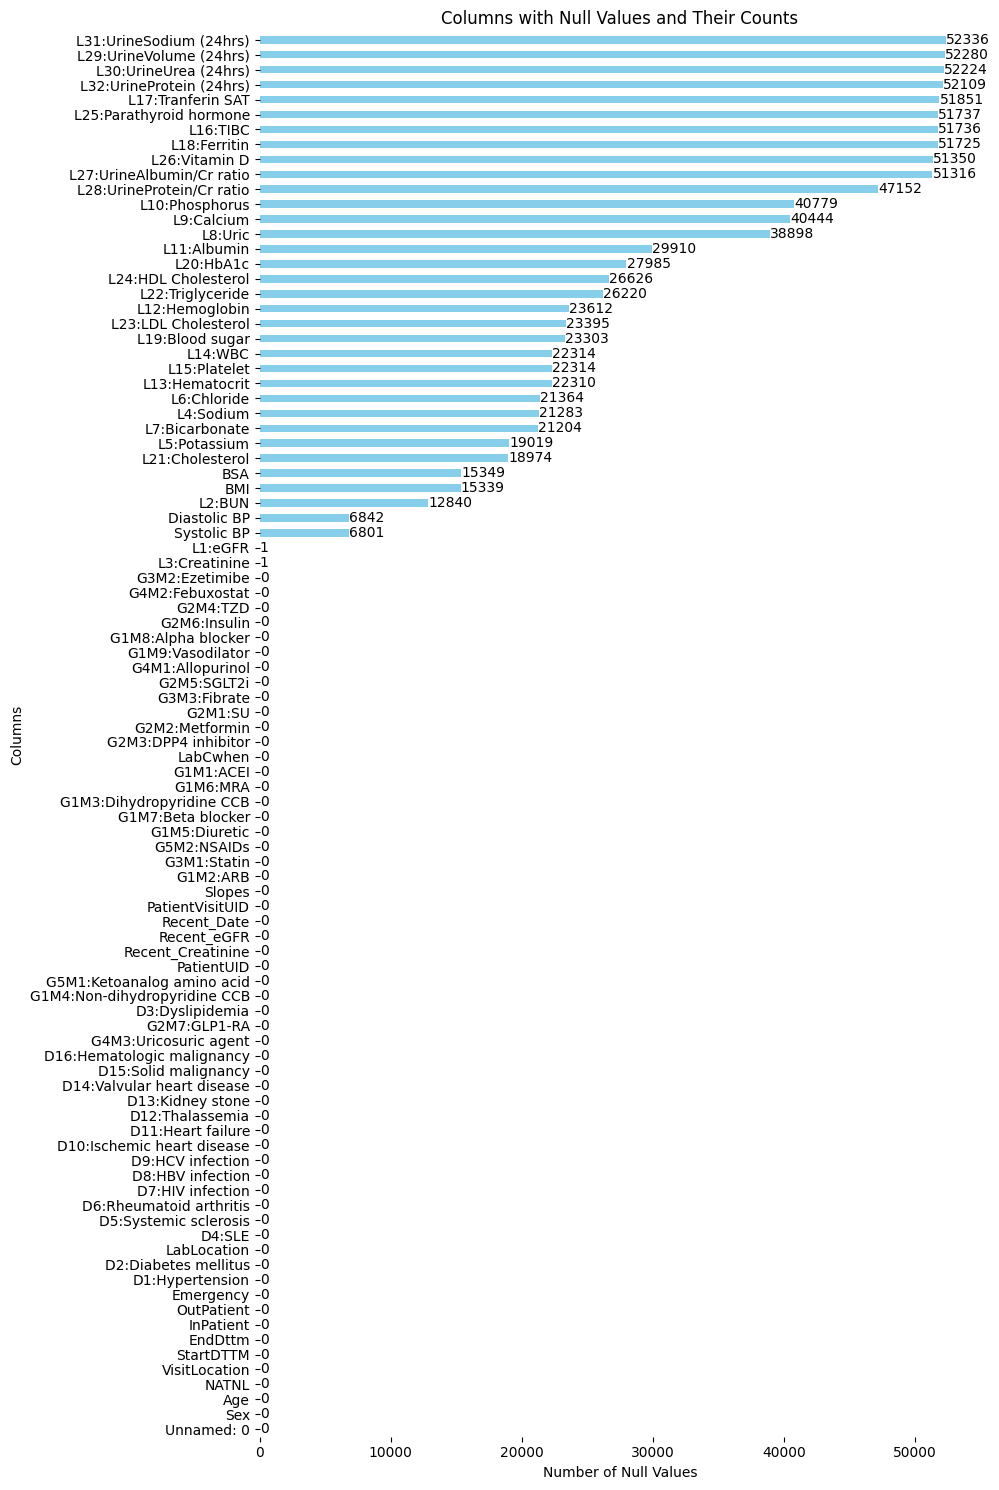

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

null_df = df.isnull()
null_count = null_df.sum()
null_count_sorted = null_count.sort_values()
plt.figure(figsize=(10, 15))  # Adjust the figsize to control the plot size
ax = null_count_sorted.plot(kind='barh', color='skyblue', edgecolor='none')  # Use 'barh' for horizontal bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('Columns with Null Values and Their Counts')
plt.xlabel('Number of Null Values')
plt.ylabel('Columns')
plt.tight_layout()
label_distance = 10
for i, v in enumerate(null_count_sorted):
    ax.text(v + label_distance, i, str(v), color='black', va='center')

plt.show()

In [5]:
df.shape #ข้อมูลทั้งหมดมี 94 คอลัมน์

(52620, 94)

In [6]:
# สร้างตัวแปรมาเก็บค่า Missing โดยรวม "Unnamed: 0", "PatientUID", "Slopes", "Recent_eGFR"
missing_columns = df.columns[(df.isnull().any()) | (df.columns.isin(["Unnamed: 0", "PatientUID", "Slopes", "Recent_eGFR"]))].tolist()
# สร้าง DataFrame ที่มีเฉพาะคอลัมน์ที่มีค่าที่หายไป
data = df[missing_columns]
data #36 คอลัมน์ที่มีค่าว่าง

,Unnamed: 0,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,0,924852,15.80,2.754717,NaN,NaN,53.0,131.0,13.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,989278,32.30,-46.720000,18.71,1.70,71.0,121.0,80.30,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2103792,55.90,11.018868,23.56,1.47,93.0,143.0,44.70,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,953611,51.10,17.222520,27.50,1.41,60.0,120.0,33.50,28.9,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,488150,32.60,-79.002653,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,55.28,-4.929870,NaN,NaN,NaN,NaN,73.30,25.0,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,52616,43763,55.28,16.017287,35.26,2.03,66.0,147.0,68.10,24.8,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,52617,43763,55.28,-24.861814,NaN,NaN,NaN,NaN,84.60,17.8,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,52618,43763,55.28,4.558175,NaN,NaN,NaN,NaN,56.06,23.8,...,112.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##แบ่งระยะโรคไตตามค่า eGFR 5 ระยะ
* ระยะที่ 1 มีค่า > 90 ขึ้นไป
* ระยะที่ 2  มีค่าอยู่ระหว่าง 89-60
* ระยะที่ 3  มีค่าอยุ๋ระหว่าง 59-30
* ระยะที่ 4 มีค่าอยู่ระหว่าง 29-15
* ระยะที่ 5 มีค่า <15 ลงไป

In [7]:
# สร้างฟังก์ชันสำหรับแบ่งข้อมูลตามระดับ 'Recent_eGFR'
def categorize_eGFR(eGFR_value):
    if eGFR_value > 90:
        return 'ระยะที่ 1'
    elif 89 >= eGFR_value >= 60:
        return 'ระยะที่ 2'
    elif 59 >= eGFR_value >= 30:
        return 'ระยะที่ 3'
    elif 29 >= eGFR_value >= 15:
        return 'ระยะที่ 4'
    else:
        return 'ระยะที่ 5'

# เพิ่มคอลัมน์ 'eGFR_Category' ที่บอกระดับของ 'Recent_eGFR'
data['eGFR_Category'] = data['Recent_eGFR'].apply(categorize_eGFR)
data

<ipython-input-7-f78b7e114467>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['eGFR_Category'] = data['Recent_eGFR'].apply(categorize_eGFR)


,Unnamed: 0,PatientUID,Recent_eGFR,Slopes,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,L2:BUN,...,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),eGFR_Category
0,0,924852,15.80,2.754717,NaN,NaN,53.0,131.0,13.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 4
1,1,989278,32.30,-46.720000,18.71,1.70,71.0,121.0,80.30,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
2,2,2103792,55.90,11.018868,23.56,1.47,93.0,143.0,44.70,22.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
3,3,953611,51.10,17.222520,27.50,1.41,60.0,120.0,33.50,28.9,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
4,4,488150,32.60,-79.002653,NaN,NaN,NaN,NaN,114.20,NaN,...,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,ระยะที่ 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,55.28,-4.929870,NaN,NaN,NaN,NaN,73.30,25.0,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
52616,52616,43763,55.28,16.017287,35.26,2.03,66.0,147.0,68.10,24.8,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
52617,52617,43763,55.28,-24.861814,NaN,NaN,NaN,NaN,84.60,17.8,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3
52618,52618,43763,55.28,4.558175,NaN,NaN,NaN,NaN,56.06,23.8,...,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ระยะที่ 3


In [8]:
#เรียงให้คอลัมน์  'Unnamed: 0', 'PatientUID', 'Slopes', 'eGFR_Category' มาอยู่ด้านหน้า
column_order = ['Unnamed: 0', 'PatientUID', 'Slopes', 'Recent_eGFR','eGFR_Category'] + [col for col in data.columns if col not in ['Unnamed: 0', 'PatientUID', 'Slopes', 'Recent_eGFR', 'eGFR_Category']]
data1 = data[column_order]
data1

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,0,924852,2.754717,15.80,ระยะที่ 4,NaN,NaN,53.0,131.0,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,989278,-46.720000,32.30,ระยะที่ 3,18.71,1.70,71.0,121.0,80.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2103792,11.018868,55.90,ระยะที่ 3,23.56,1.47,93.0,143.0,44.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,953611,17.222520,51.10,ระยะที่ 3,27.50,1.41,60.0,120.0,33.50,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,488150,-79.002653,32.60,ระยะที่ 3,NaN,NaN,NaN,NaN,114.20,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,-4.929870,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,73.30,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,52616,43763,16.017287,55.28,ระยะที่ 3,35.26,2.03,66.0,147.0,68.10,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,52617,43763,-24.861814,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,84.60,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,52618,43763,4.558175,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,56.06,...,112.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ดูแต่ละระยะเพื่อดูค่าว่างที่เกิดขึ้น

## stage1

In [9]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 1'
stage1 = data1[data1['eGFR_Category'] == 'ระยะที่ 1']
stage1 # 622 rows

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
93,93,1407655,-11.244949,100.30,ระยะที่ 1,NaN,NaN,71.0,94.0,126.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,107,2304528,72.432222,109.50,ระยะที่ 1,NaN,NaN,99.0,145.0,20.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,133,1946107,-59.475059,100.50,ระยะที่ 1,NaN,NaN,NaN,NaN,97.20,...,138.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,200,1138015,-14.531616,95.50,ระยะที่ 1,0.22,7.25,76.0,115.0,79.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,211,1486805,2.085714,95.90,ระยะที่ 1,24.56,1.57,71.0,124.0,55.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52124,52124,218497,-20.531250,97.68,ระยะที่ 1,NaN,NaN,68.0,147.0,83.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52125,52125,218497,9.258910,97.68,ระยะที่ 1,NaN,NaN,NaN,NaN,62.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52126,52126,218497,-3.510562,97.68,ระยะที่ 1,NaN,NaN,67.0,161.0,74.50,...,91.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52127,52127,218497,13.338929,97.68,ระยะที่ 1,NaN,NaN,67.0,146.0,70.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage1_missing = stage1.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage1_missing / len(stage1)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing1 = pd.DataFrame({
    'Missing Values': stage1_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing1

,Missing Values,Missing Values (%)
Unnamed: 0,0,0.000000
PatientUID,0,0.000000
Slopes,0,0.000000
Recent_eGFR,0,0.000000
eGFR_Category,0,0.000000
BMI,222,35.691318
BSA,223,35.852090
Diastolic BP,79,12.700965
Systolic BP,79,12.700965
L1:eGFR,0,0.000000


In [23]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage1_sort = stage1[stage1['eGFR_Category'] == 'ระยะที่ 1'].sort_values(by='Recent_eGFR', ascending=True)
stage1_sort

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
43116,43116,449755,-4.718523,90.04,ระยะที่ 1,23.67,1.63,68.0,119.0,101.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6458,6458,2767452,-34.410855,90.04,ระยะที่ 1,18.73,1.55,68.0,115.0,108.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6459,6459,2767452,23.485733,90.04,ระยะที่ 1,NaN,NaN,84.0,134.0,65.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43118,43118,449755,6.099599,90.04,ระยะที่ 1,18.28,1.43,57.0,104.0,67.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43117,43117,449755,-28.836962,90.04,ระยะที่ 1,23.83,1.63,61.0,116.0,96.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5318,5318,2384626,7.984375,125.93,ระยะที่ 1,23.31,1.54,93.0,132.0,100.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5319,5319,2384626,0.795640,125.93,ระยะที่ 1,NaN,NaN,99.0,144.0,108.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,5317,2384626,79.441176,125.93,ระยะที่ 1,NaN,NaN,86.0,152.0,42.50,...,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN
51784,51784,553538,-51.636256,140.75,ระยะที่ 1,NaN,NaN,67.0,103.0,142.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

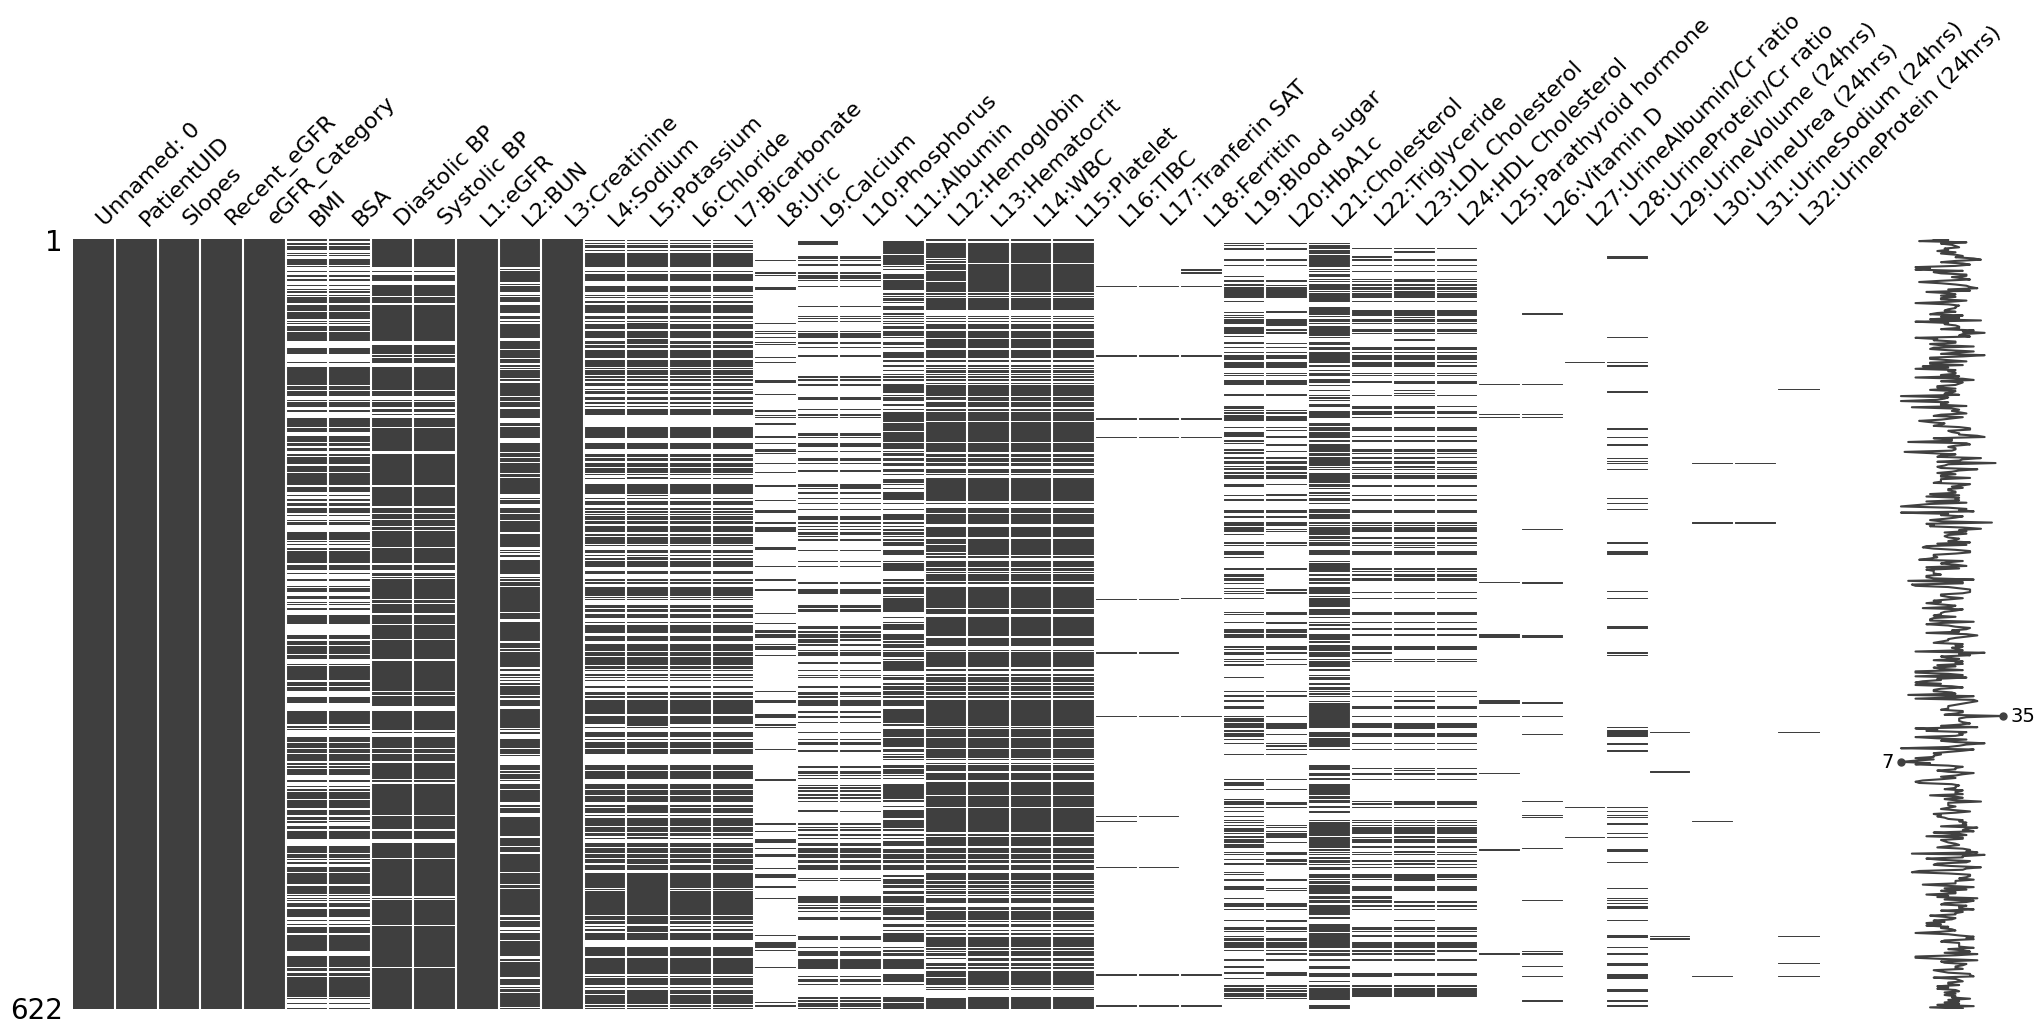

In [24]:
import missingno as msno
msno.matrix(stage1_sort) #เฉพาะค่า Missing

#Stage2

In [15]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 2'
stage2 = data1[data1['eGFR_Category'] == 'ระยะที่ 2']
stage2 #13802 rows

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
7,7,854989,44.179221,76.10,ระยะที่ 2,29.20,1.75,77.0,148.0,29.50,...,59.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,2261796,3.920716,68.80,ระยะที่ 2,24.89,1.50,59.0,103.0,64.60,...,63.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,1167788,31.427793,74.70,ระยะที่ 2,21.83,1.62,58.0,130.0,59.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,622412,4.777487,88.20,ระยะที่ 2,22.49,1.75,92.0,160.0,73.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,2235293,14.901809,63.90,ระยะที่ 2,27.34,1.73,83.0,149.0,48.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52606,52606,2180110,-9.147643,72.45,ระยะที่ 2,NaN,NaN,NaN,NaN,128.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52607,52607,2180110,6.725197,72.45,ระยะที่ 2,NaN,NaN,NaN,NaN,118.50,...,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN
52608,52608,2180110,-4.828042,72.45,ระยะที่ 2,23.81,1.78,71.0,138.0,125.52,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
52609,52609,2180110,-14.127763,72.45,ระยะที่ 2,NaN,NaN,NaN,NaN,120.52,...,NaN,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN


In [16]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage2_missing = stage2.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage2_missing / len(stage2)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing2 = pd.DataFrame({
    'Missing Values': stage2_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing2

,Missing Values,Missing Values (%)
Unnamed: 0,0,0.000000
PatientUID,0,0.000000
Slopes,0,0.000000
Recent_eGFR,0,0.000000
eGFR_Category,0,0.000000
BMI,3859,27.959716
BSA,3863,27.988697
Diastolic BP,1825,13.222721
Systolic BP,1812,13.128532
L1:eGFR,1,0.007245


In [25]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage2_sort = stage2[stage2['eGFR_Category'] == 'ระยะที่ 2'].sort_values(by='Recent_eGFR', ascending=True)
stage2_sort

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
15750,15750,1639573,0.087112,60.00,ระยะที่ 2,23.15,1.58,88.0,153.0,53.90,...,86.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33477,33477,983840,20.051899,60.00,ระยะที่ 2,NaN,NaN,NaN,NaN,65.30,...,129.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42003,42003,804122,3.544085,60.00,ระยะที่ 2,18.50,1.37,73.0,144.0,85.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42002,42002,804122,-1.124210,60.00,ระยะที่ 2,17.94,1.35,62.0,137.0,60.00,...,101.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960,1960,1522490,-12.369928,60.00,ระยะที่ 2,NaN,NaN,77.0,121.0,67.00,...,112.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,34460,2148565,10.508395,88.92,ระยะที่ 2,21.23,1.48,89.0,148.0,58.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34461,34461,2148565,16.493545,88.92,ระยะที่ 2,NaN,NaN,92.0,146.0,69.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7951,7951,1842059,0.960526,88.92,ระยะที่ 2,26.30,1.87,87.0,131.0,82.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7950,7950,1842059,10.828645,88.92,ระยะที่ 2,25.26,1.84,76.0,117.0,71.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

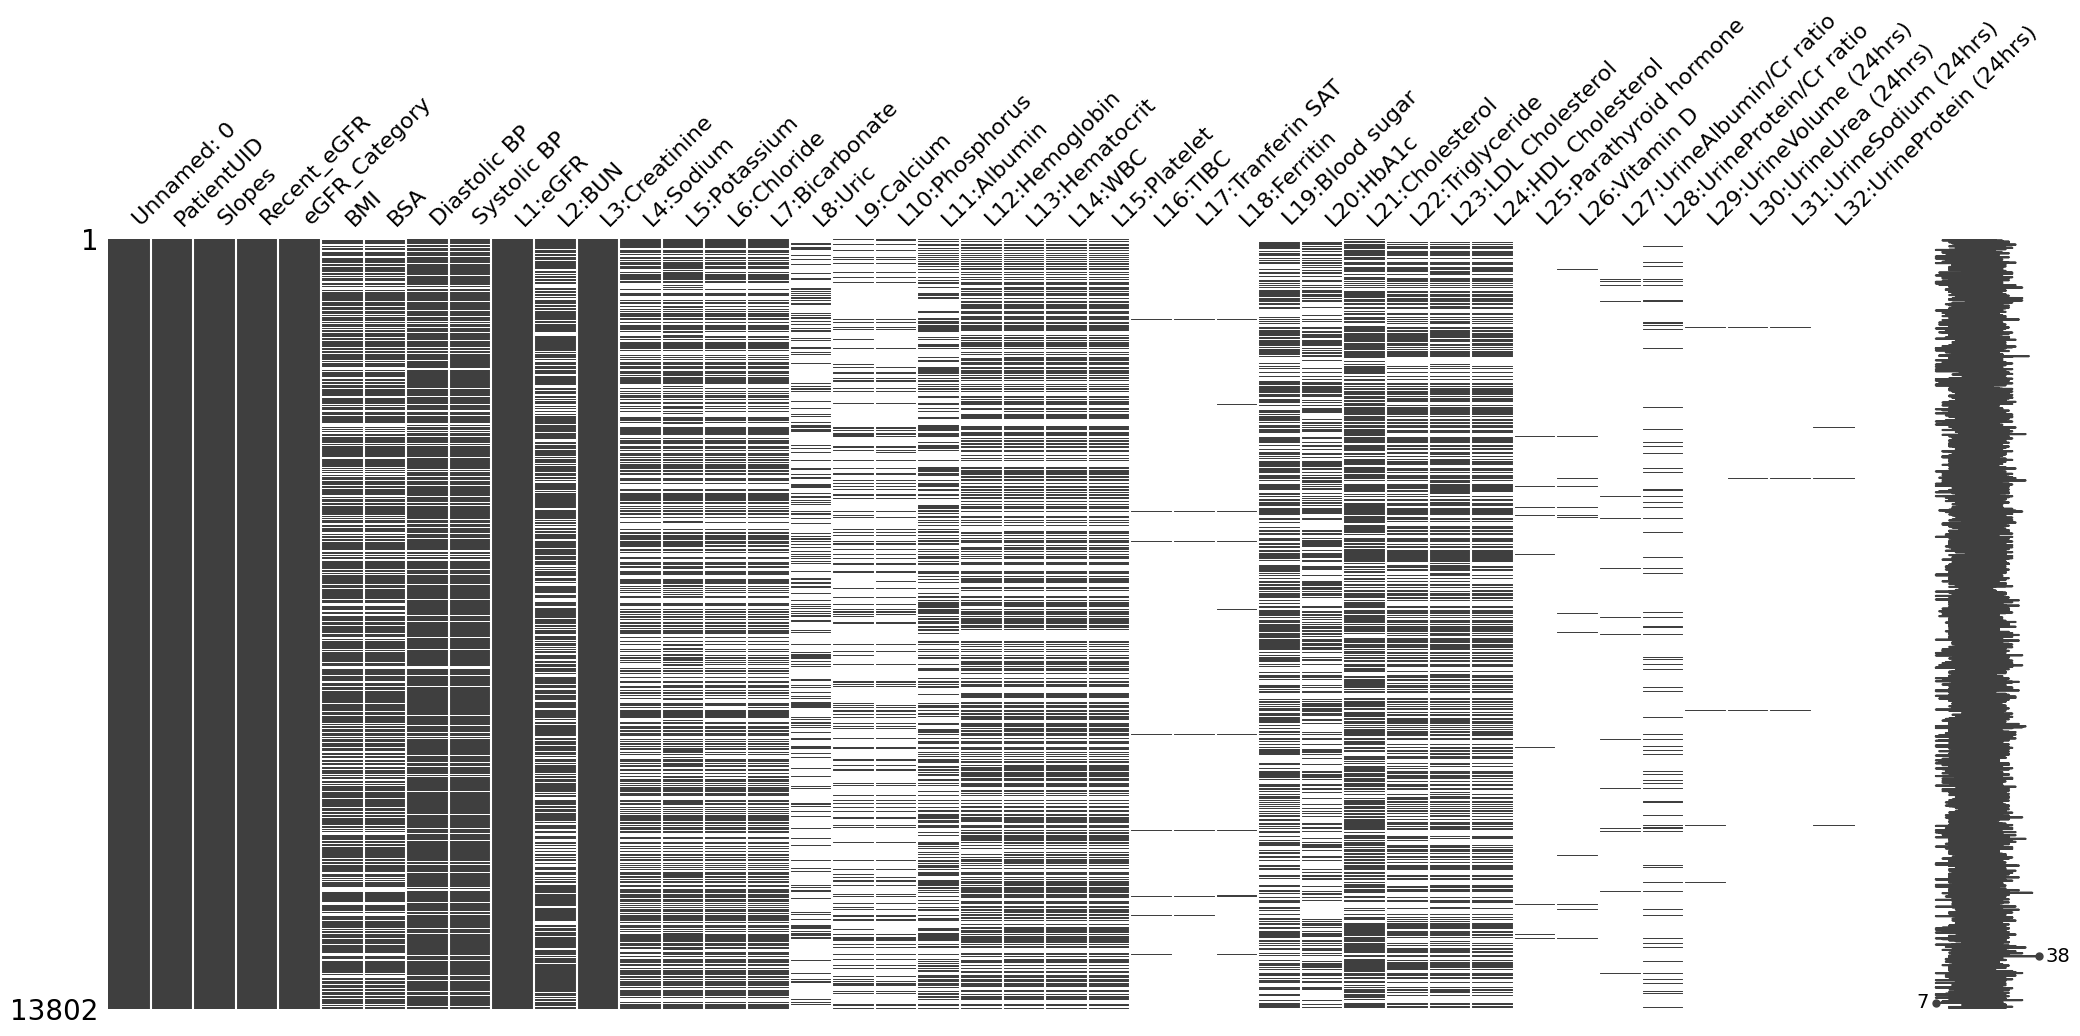

In [26]:
msno.matrix(stage2_sort)

##stage 3

In [17]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 3'
stage3 = data1[data1['eGFR_Category'] == 'ระยะที่ 3']
stage3 #29767 rows

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
1,1,989278,-46.720000,32.30,ระยะที่ 3,18.71,1.70,71.0,121.0,80.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2103792,11.018868,55.90,ระยะที่ 3,23.56,1.47,93.0,143.0,44.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,953611,17.222520,51.10,ระยะที่ 3,27.50,1.41,60.0,120.0,33.50,...,147.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,488150,-79.002653,32.60,ระยะที่ 3,NaN,NaN,NaN,NaN,114.20,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN
5,5,2155195,7.551724,54.10,ระยะที่ 3,24.80,1.50,87.0,133.0,46.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52615,52615,43763,-4.929870,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,73.30,...,122.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52616,52616,43763,16.017287,55.28,ระยะที่ 3,35.26,2.03,66.0,147.0,68.10,...,101.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52617,52617,43763,-24.861814,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,84.60,...,113.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52618,52618,43763,4.558175,55.28,ระยะที่ 3,NaN,NaN,NaN,NaN,56.06,...,112.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage3_missing = stage3.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage3_missing / len(stage3)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing3 = pd.DataFrame({
    'Missing Values': stage3_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing3

,Missing Values,Missing Values (%)
Unnamed: 0,0,0.000000
PatientUID,0,0.000000
Slopes,0,0.000000
Recent_eGFR,0,0.000000
eGFR_Category,0,0.000000
BMI,8485,28.504720
BSA,8489,28.518158
Diastolic BP,3909,13.131992
Systolic BP,3890,13.068163
L1:eGFR,0,0.000000


In [27]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage3_sort = stage3[stage3['eGFR_Category'] == 'ระยะที่ 3'].sort_values(by='Recent_eGFR', ascending=True)
stage3_sort

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
28588,28588,755749,-6.581202,30.00,ระยะที่ 3,NaN,NaN,60.0,136.0,41.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28587,28587,755749,-5.412985,30.00,ระยะที่ 3,16.85,1.73,63.0,140.0,37.26,...,125.0,56.0,NaN,NaN,NaN,48.9,NaN,NaN,NaN,NaN
28586,28586,755749,13.600595,30.00,ระยะที่ 3,19.29,1.80,65.0,126.0,31.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17069,17069,559861,-3.339802,30.03,ระยะที่ 3,NaN,NaN,NaN,NaN,40.20,...,92.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16314,16314,1383229,-0.195038,30.03,ระยะที่ 3,NaN,NaN,68.0,123.0,39.60,...,106.0,44.0,NaN,14.6,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,1467,22554,-3.506863,59.00,ระยะที่ 3,NaN,NaN,NaN,NaN,62.60,...,158.0,55.0,NaN,NaN,NaN,101.3,NaN,NaN,NaN,NaN
1450,1450,1021475,-1.088076,59.00,ระยะที่ 3,23.99,1.54,83.0,131.0,60.10,...,126.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,738,648714,3.301508,59.00,ระยะที่ 3,22.68,1.55,71.0,131.0,55.40,...,161.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,737,648714,-0.901235,59.00,ระยะที่ 3,18.51,1.55,67.0,115.0,56.40,...,150.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

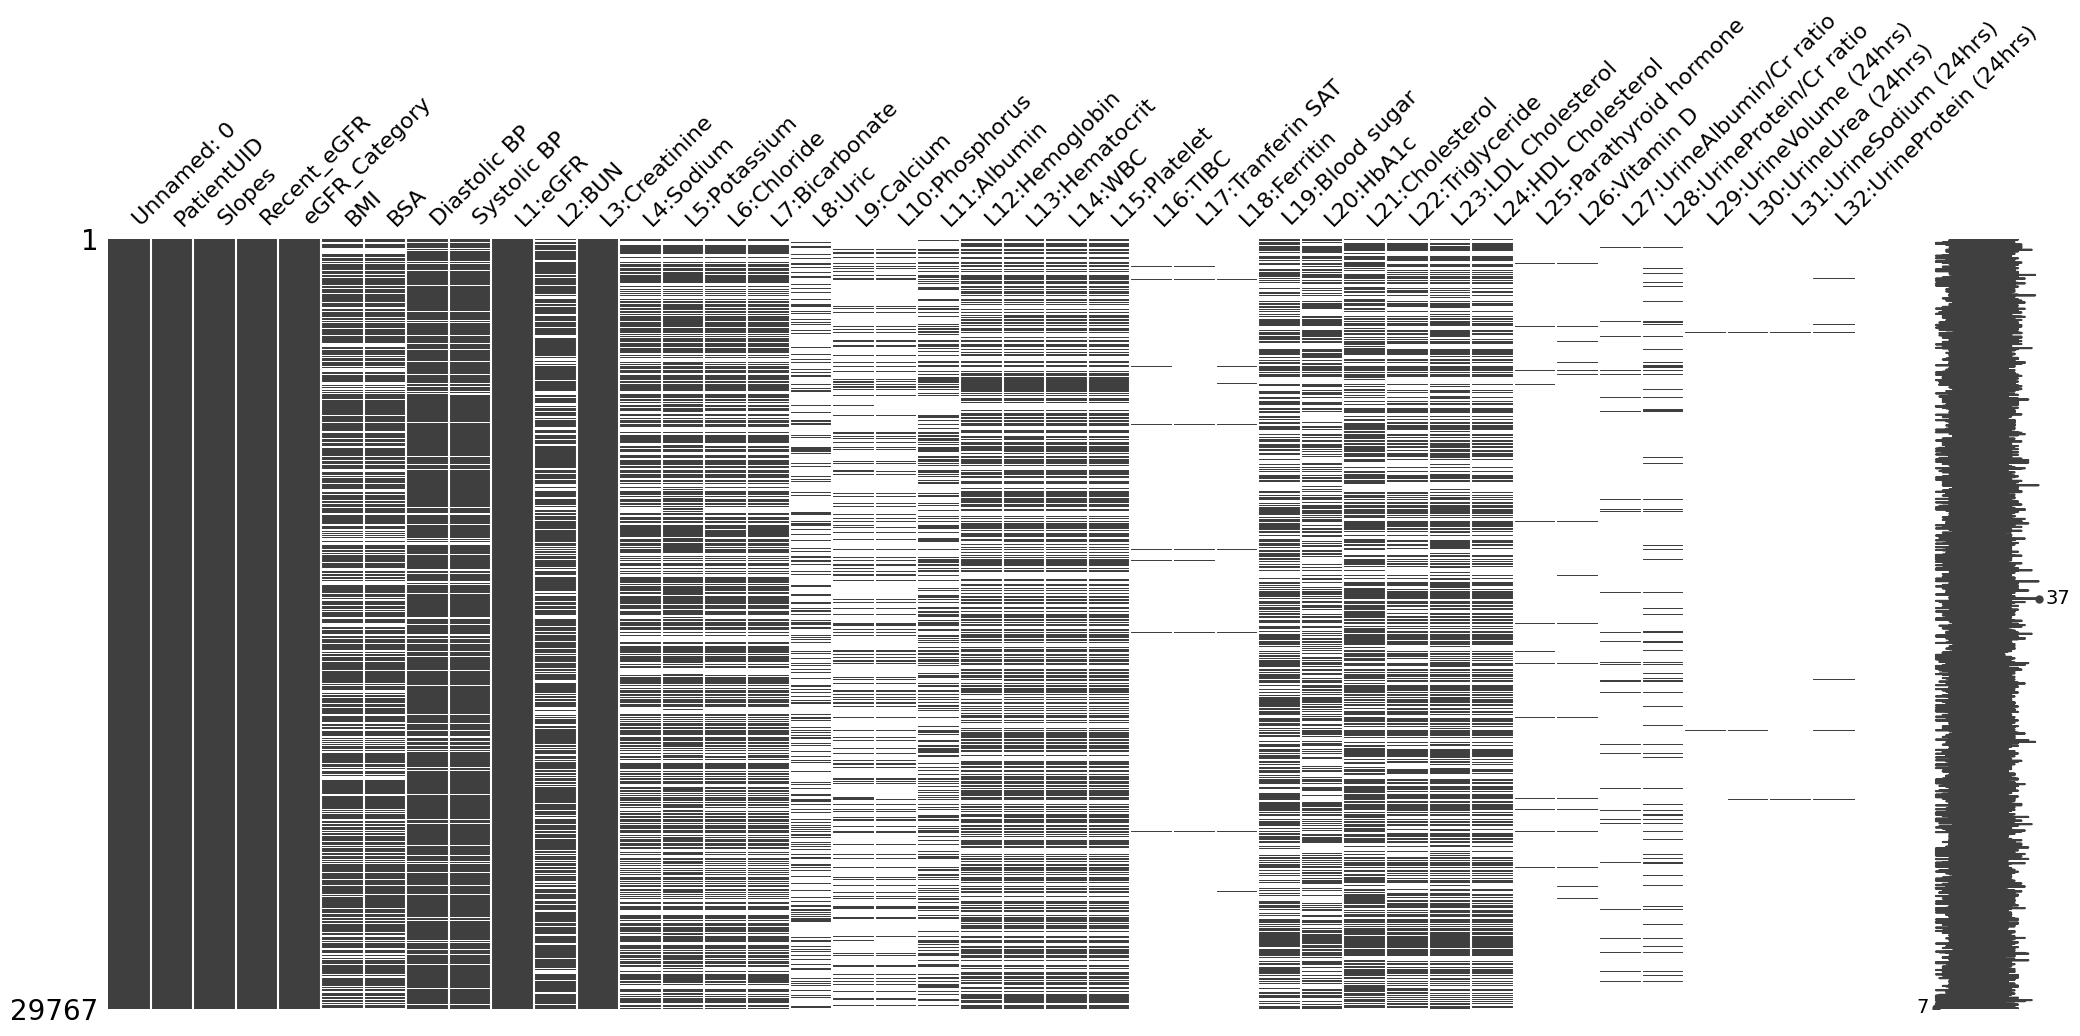

In [28]:
msno.matrix(stage3_sort)

##stage 4

In [19]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 4'
stage4 = data1[data1['eGFR_Category'] == 'ระยะที่ 4']
stage4 #3801 rows

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
0,0,924852,2.754717,15.80,ระยะที่ 4,NaN,NaN,53.0,131.0,13.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,2100059,3.284062,24.30,ระยะที่ 4,19.10,1.39,69.0,147.0,19.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23,2254971,-7.745358,21.40,ระยะที่ 4,NaN,NaN,NaN,NaN,29.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,310174,-37.971033,28.20,ระยะที่ 4,NaN,NaN,84.0,146.0,73.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,33,539225,-2.977632,22.80,ระยะที่ 4,27.72,1.95,45.0,115.0,36.30,...,50.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52588,52588,1871546,4.110000,18.81,ระยะที่ 4,14.93,1.24,52.0,126.0,25.90,...,72.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52589,52589,1871546,-5.936446,18.81,ระยะที่ 4,14.95,1.25,66.0,149.0,30.01,...,NaN,NaN,NaN,NaN,NaN,23.7,NaN,NaN,NaN,NaN
52590,52590,1871546,0.629310,18.81,ระยะที่ 4,NaN,NaN,NaN,NaN,22.87,...,87.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52591,52591,1871546,-8.162727,18.81,ระยะที่ 4,15.11,1.22,34.0,136.0,23.57,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage4_missing = stage4.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage4_missing / len(stage4)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing4 = pd.DataFrame({
    'Missing Values': stage4_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing4

,Missing Values,Missing Values (%)
Unnamed: 0,0,0.000000
PatientUID,0,0.000000
Slopes,0,0.000000
Recent_eGFR,0,0.000000
eGFR_Category,0,0.000000
BMI,1320,34.727703
BSA,1317,34.648777
Diastolic BP,441,11.602210
Systolic BP,436,11.470666
L1:eGFR,0,0.000000


In [29]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage4_sort = stage4[stage4['eGFR_Category'] == 'ระยะที่ 4'].sort_values(by='Recent_eGFR', ascending=True)
stage4_sort

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
2926,2926,1873855,-9.222698,15.02,ระยะที่ 4,26.04,1.66,83.0,135.0,34.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2927,2927,1873855,-4.569395,15.02,ระยะที่ 4,25.24,1.64,88.0,160.0,23.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9044,9044,389518,-38.482838,15.03,ระยะที่ 4,24.24,1.73,71.0,132.0,54.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9043,9043,389518,-8.967162,15.03,ระยะที่ 4,26.67,1.80,80.0,155.0,63.40,...,48.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9042,9042,389518,0.548872,15.03,ระยะที่ 4,26.81,1.80,80.0,123.0,62.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,3574,807630,12.760163,29.00,ระยะที่ 4,NaN,NaN,86.0,147.0,36.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3575,3575,807630,-10.631068,29.00,ระยะที่ 4,NaN,NaN,97.0,158.0,49.60,...,148.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,10688,1203020,-5.596021,29.00,ระยะที่ 4,20.93,1.44,91.0,170.0,31.20,...,153.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10689,10689,1203020,-0.170649,29.00,ระยะที่ 4,19.95,1.41,83.0,146.0,25.42,...,74.0,61.0,NaN,NaN,218.47,83.9,NaN,NaN,NaN,NaN


<Axes: >

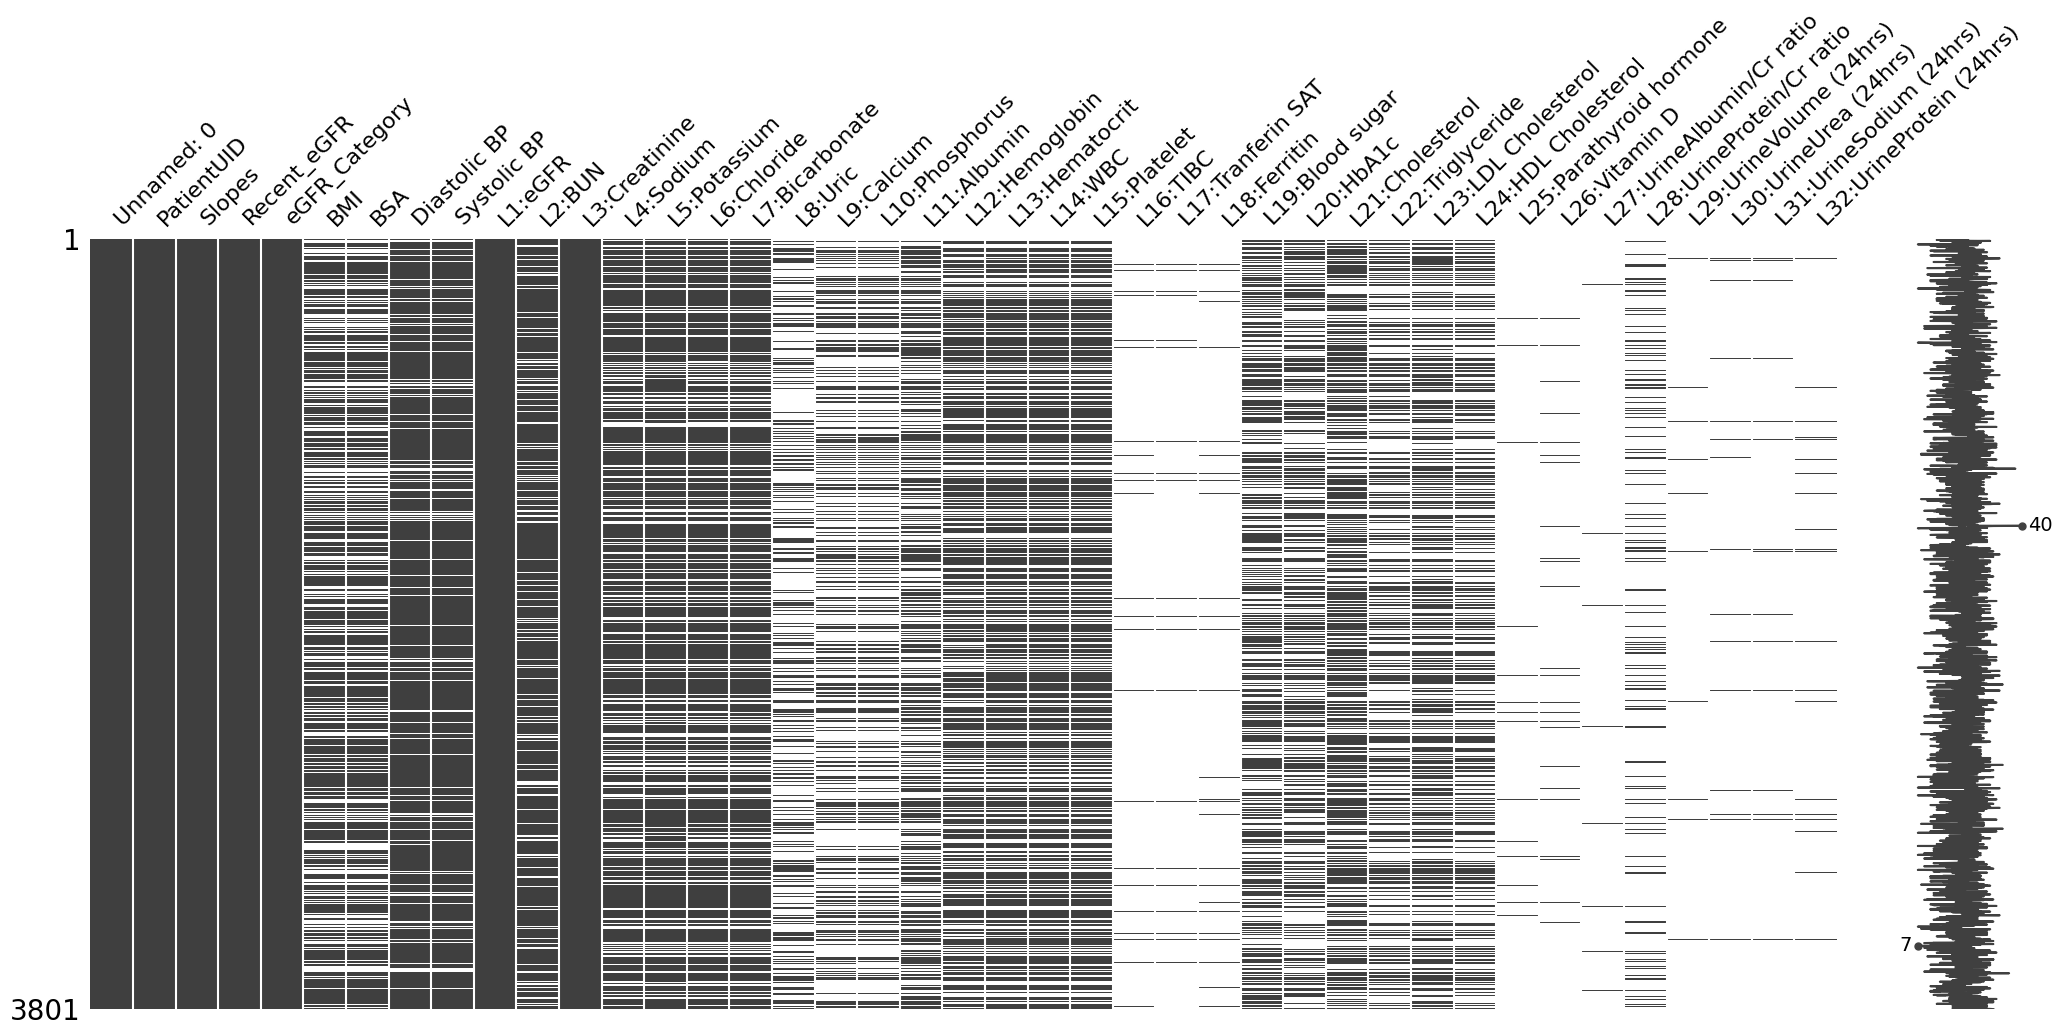

In [30]:
msno.matrix(stage4_sort)

##stage 5

In [21]:
# ใช้ตัวกรองเพื่อเลือกข้อมูลที่มี 'eGFR_Category' เป็น 'ระยะที่ 5'
stage5 = data1[data1['eGFR_Category'] == 'ระยะที่ 5']
stage5

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
8,8,1944612,-9.500000,14.80,ระยะที่ 5,NaN,NaN,68.0,111.0,54.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,21,845603,-32.967742,3.40,ระยะที่ 5,NaN,NaN,77.0,134.0,38.30,...,176.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,424420,0.098649,12.30,ระยะที่ 5,NaN,NaN,77.0,142.0,12.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,37,369589,-5.783117,12.50,ระยะที่ 5,27.06,1.64,70.0,129.0,18.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,61,2305655,-6.355721,59.20,ระยะที่ 5,22.89,1.53,75.0,128.0,66.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52572,52572,635962,-2.733480,59.11,ระยะที่ 5,26.19,1.87,76.0,147.0,58.60,...,204.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52573,52573,635962,-2.711051,59.11,ระยะที่ 5,26.99,1.89,91.0,144.0,55.20,...,148.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52574,52574,635962,1.263801,59.11,ระยะที่ 5,25.95,1.86,95.0,147.0,51.10,...,101.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52575,52575,635962,2.245466,59.11,ระยะที่ 5,NaN,NaN,NaN,NaN,52.53,...,126.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# คำนวณจำนวนค่าที่ขาดหายไปในแต่ละคอลัมน์
stage5_missing = stage5.isnull().sum()

# คำนวณเปอร์เซ็นต์ของค่าที่ขาดหายไปในแต่ละคอลัมน์
missing_percent = 100 * stage5_missing / len(stage5)

# สร้าง DataFrame ที่ประกอบด้วยจำนวนค่าที่ขาดหายไปและเปอร์เซ็นต์ของค่าที่ขาดหายไป
missing5 = pd.DataFrame({
    'Missing Values': stage5_missing,
    'Missing Values (%)': missing_percent
})

# แสดงผลลัพธ์ DataFrame ที่ถูกเรียงลำดับ
missing5

,Missing Values,Missing Values (%)
Unnamed: 0,0,0.000000
PatientUID,0,0.000000
Slopes,0,0.000000
Recent_eGFR,0,0.000000
eGFR_Category,0,0.000000
BMI,1453,31.395851
BSA,1457,31.482282
Diastolic BP,588,12.705272
Systolic BP,584,12.618842
L1:eGFR,0,0.000000


In [32]:
# เรียงข้อมูลตามคอลัมน์ 'Recent_eGFR' จากน้อยไปมาก
stage5_sort = stage5[stage5['eGFR_Category'] == 'ระยะที่ 5'].sort_values(by='Recent_eGFR', ascending=True)
stage5_sort

,Unnamed: 0,PatientUID,Slopes,Recent_eGFR,eGFR_Category,BMI,BSA,Diastolic BP,Systolic BP,L1:eGFR,...,L23:LDL Cholesterol,L24:HDL Cholesterol,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs)
14356,14356,995791,-4.212297,1.05,ระยะที่ 5,30.86,1.82,66.0,177.0,7.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14355,14355,995791,-2.553202,1.05,ระยะที่ 5,29.02,1.86,61.0,178.0,10.20,...,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14354,14354,995791,0.197297,1.05,ระยะที่ 5,29.75,1.88,63.0,155.0,10.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14353,14353,995791,-0.494580,1.05,ระยะที่ 5,30.12,1.89,76.0,155.0,10.50,...,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14352,14352,995791,-4.615925,1.05,ระยะที่ 5,31.21,1.94,76.0,147.0,15.90,...,155.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,4032,269896,-9.125000,89.94,ระยะที่ 5,NaN,NaN,NaN,NaN,71.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7524,7524,1398698,4.841253,89.97,ระยะที่ 5,22.10,1.61,73.0,137.0,74.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543,543,86006,22.496855,90.00,ระยะที่ 5,NaN,NaN,80.0,160.0,58.70,...,105.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2415,2415,410969,-7.625587,90.00,ระยะที่ 5,24.33,1.81,71.0,139.0,60.40,...,132.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

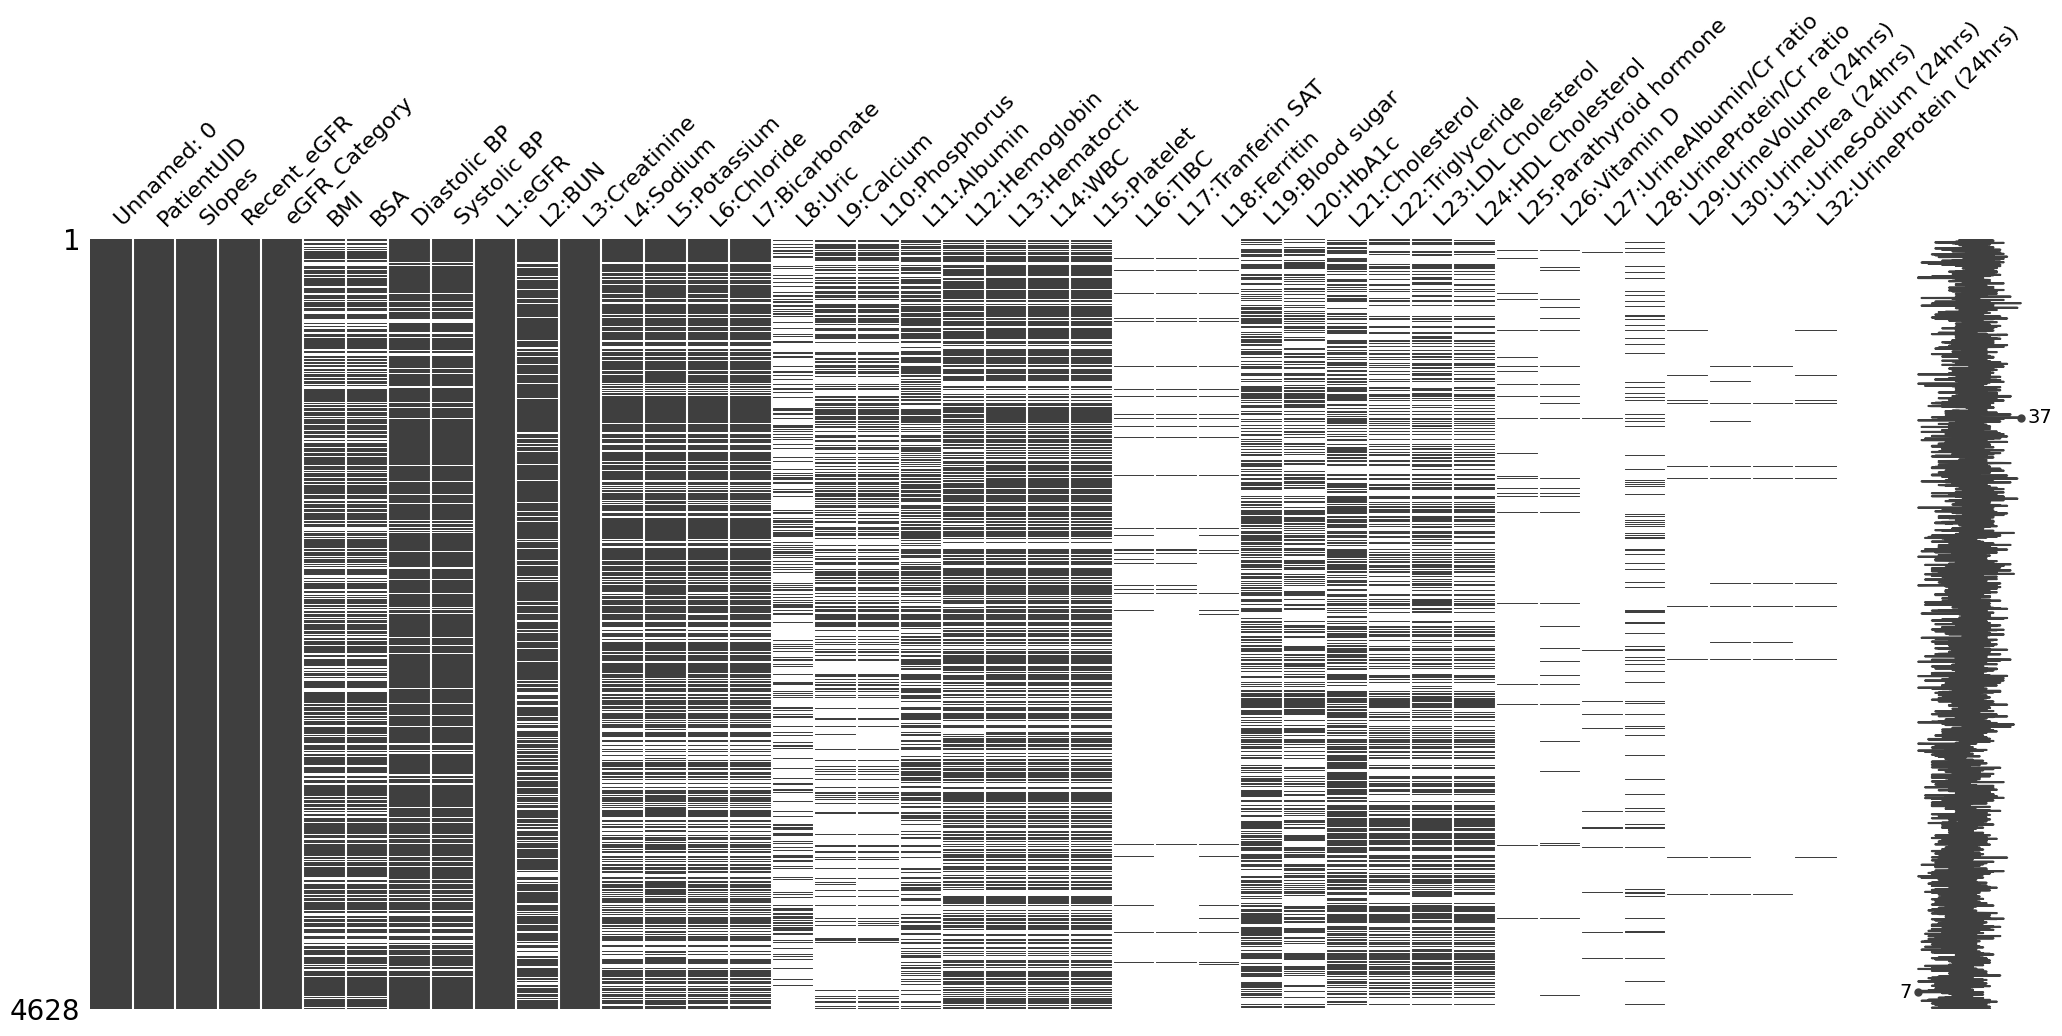

In [33]:
msno.matrix(stage5_sort)

##แบ่งตามช่วง slope